In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt


In [2]:
from gapminder import gapminder

In [3]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


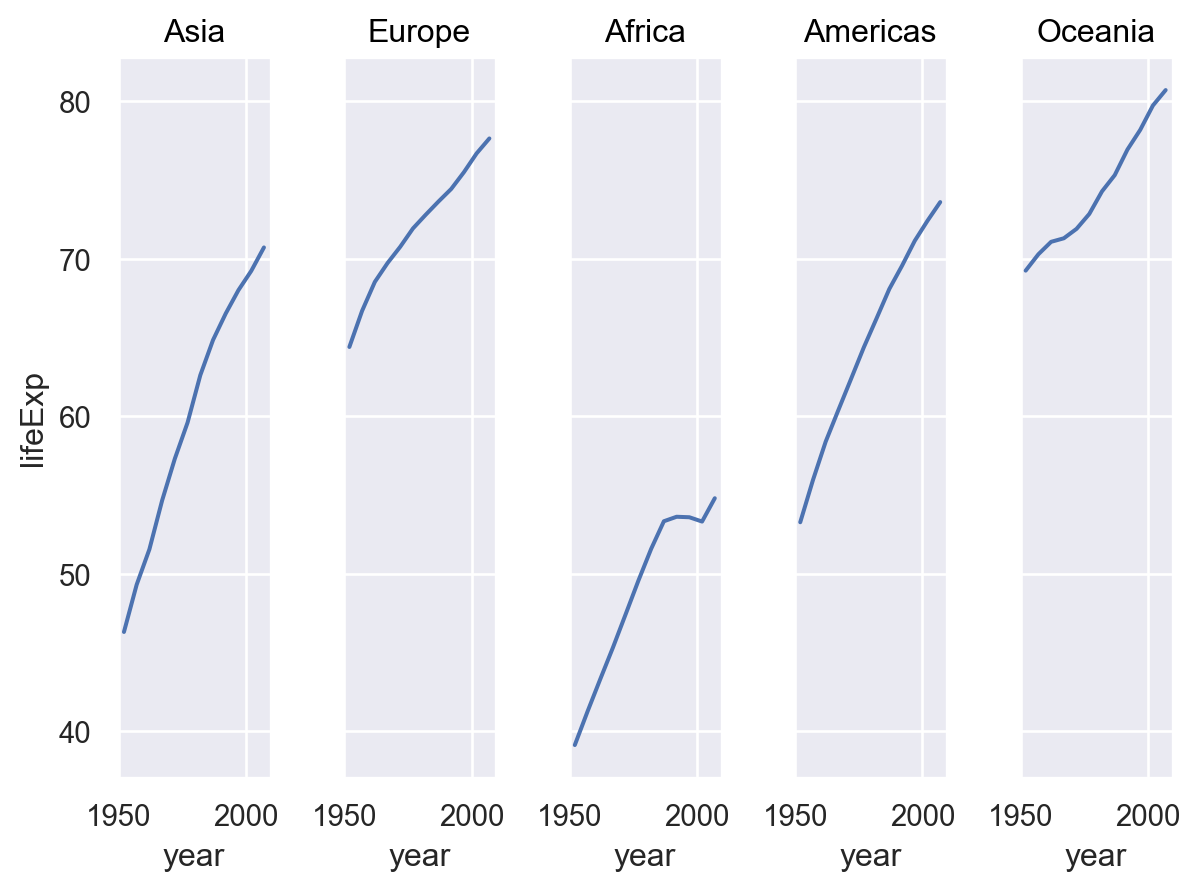

In [11]:
(
    so.Plot(gapminder, x='year', y='lifeExp')
    .add(so.Line(),so.Agg())
    # .add(so.Dot(),so.Agg())
    # .add(so.Dot())
    .facet('continent',)
)

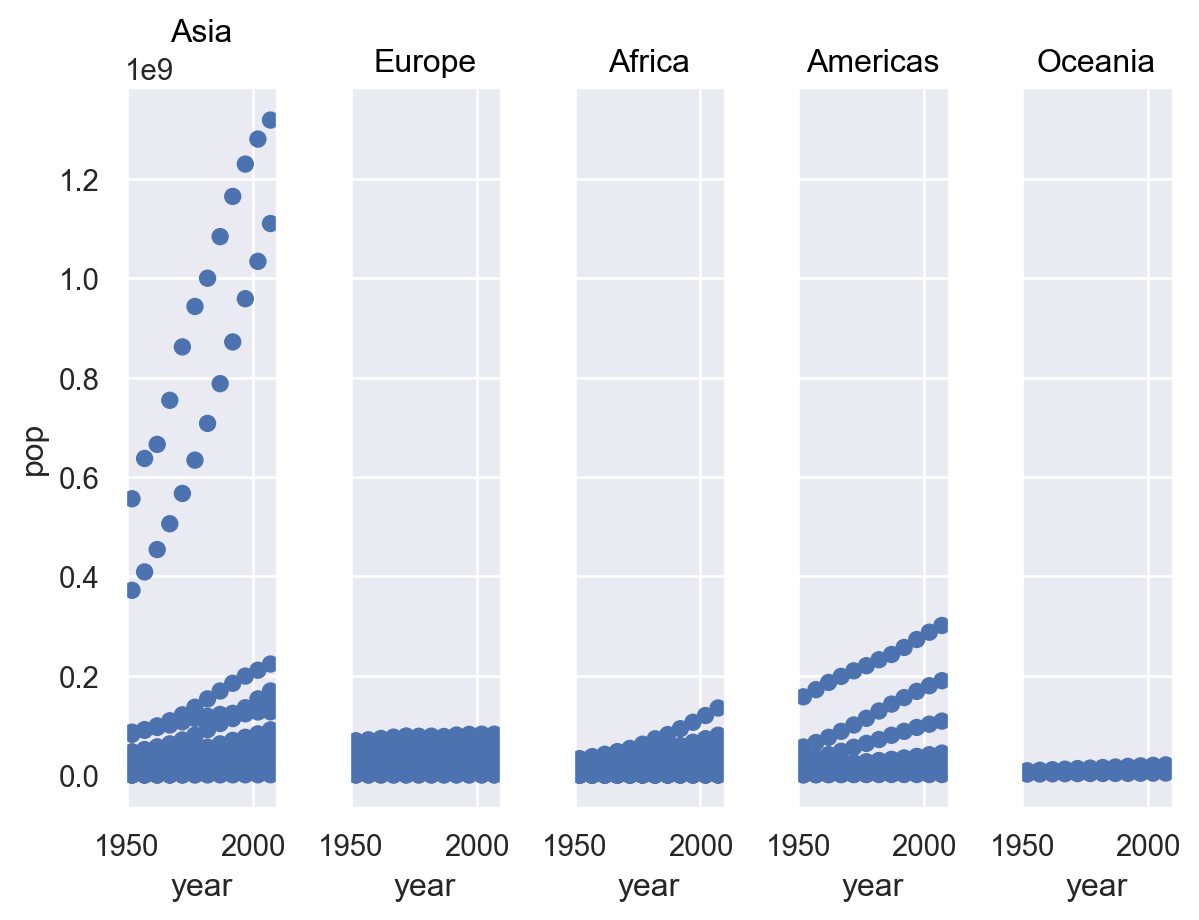

In [6]:
(
    so.Plot(gapminder, x='year', y='pop')
    .add(so.Dot())
    .facet('continent')
)

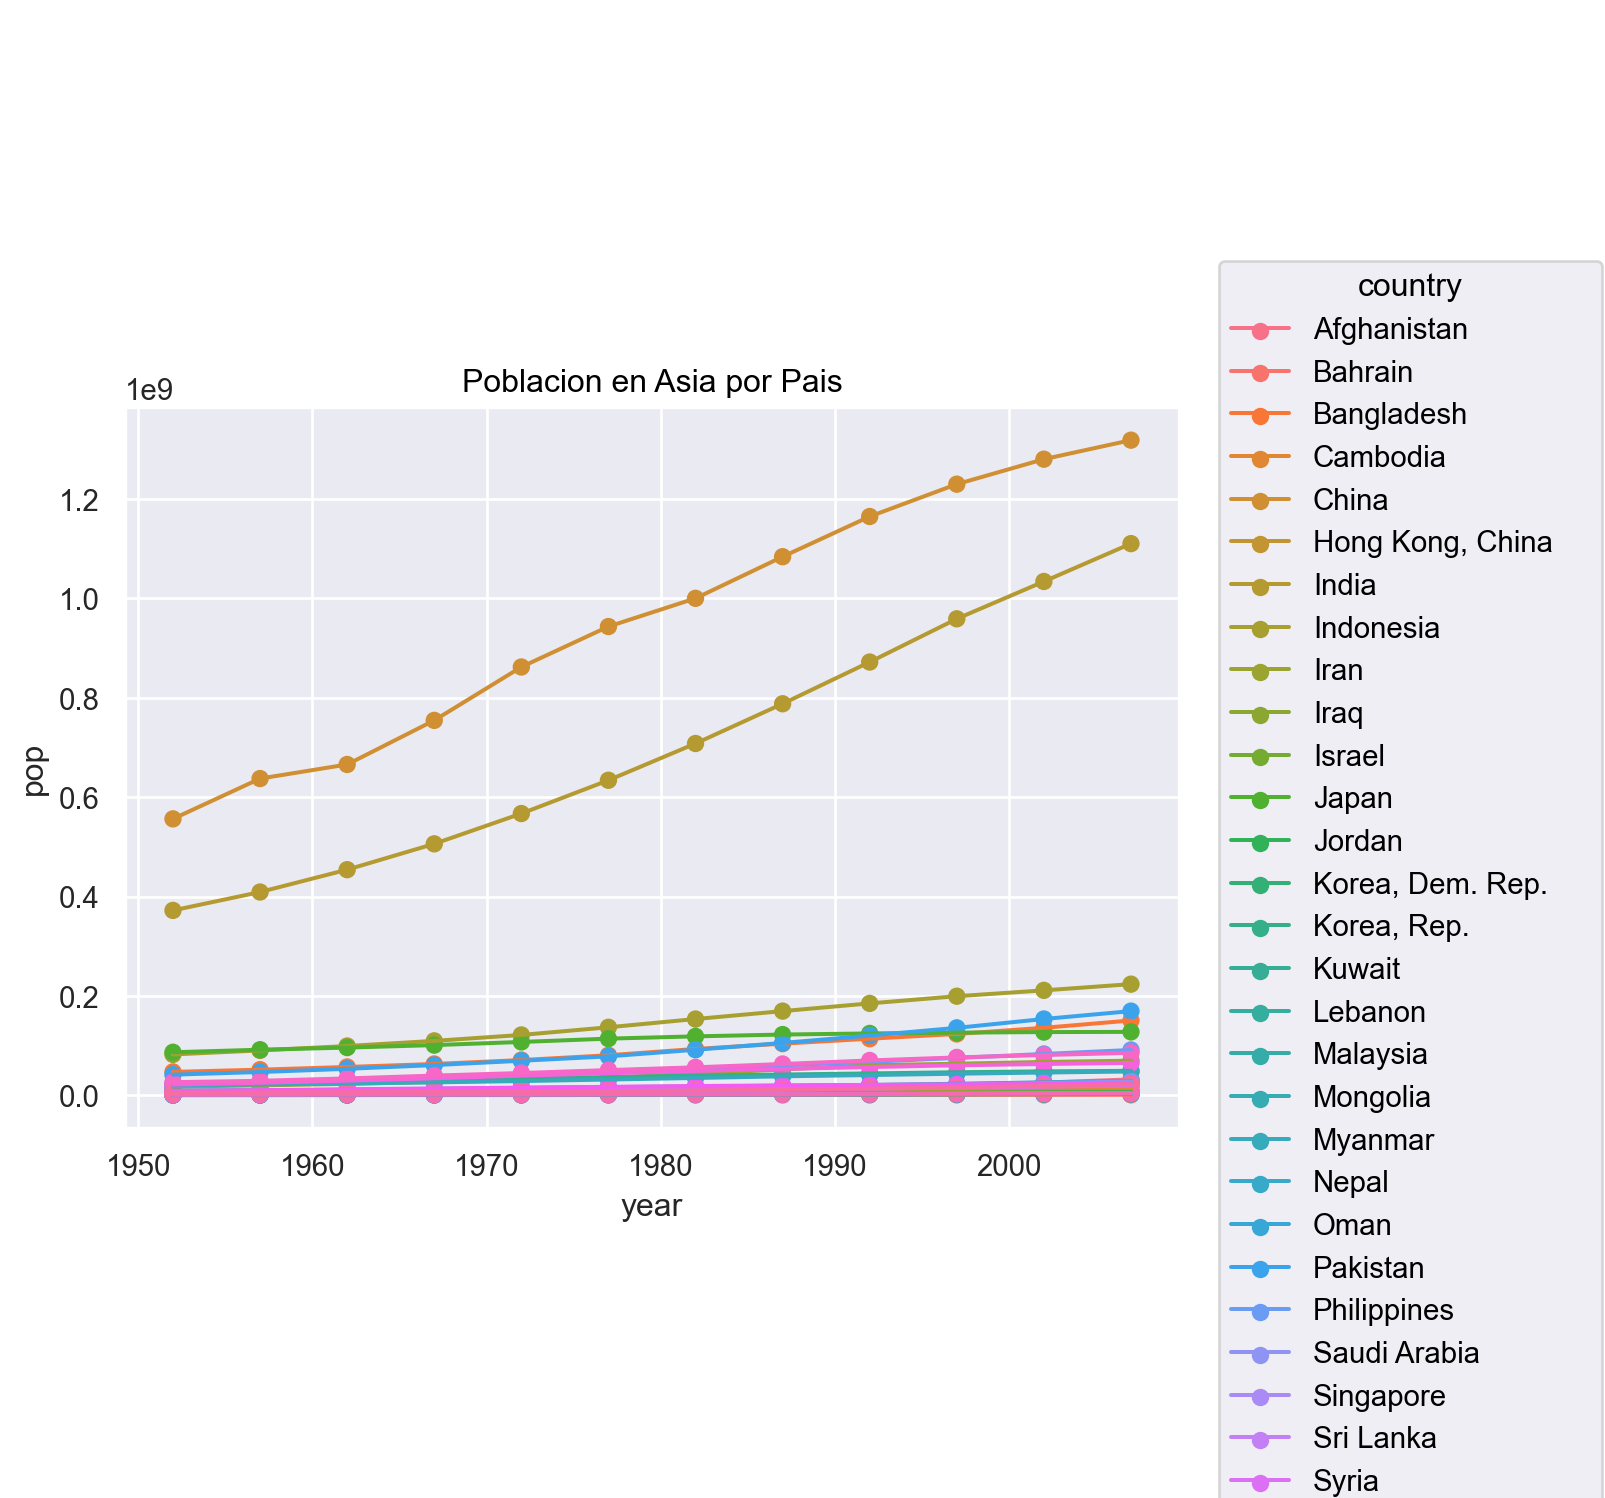

In [4]:
datosAsia = gapminder[gapminder['continent'] == 'Asia']

(
    so.Plot(datosAsia, x='year', y='pop',color='country')
    .add(so.Dot())
    .add(so.Line())
    .label(title="Poblacion en Asia por Pais")

)

In [17]:
datosAsia[datosAsia["year"]==1952].sort_values("pop",ascending=False).head(2)

,country,continent,year,lifeExp,pop,gdpPercap
288,China,Asia,1952,44.000,556263527,400.448611
696,India,Asia,1952,37.373,372000000,546.565749


## Ideas de graficos:

### NUMERO 1 (la clasica)

Un grafico que muestre la evolucion de la esperanza de vida lifeExp y PIB per capita gdpPercap por continente, podria tomar el promedio 

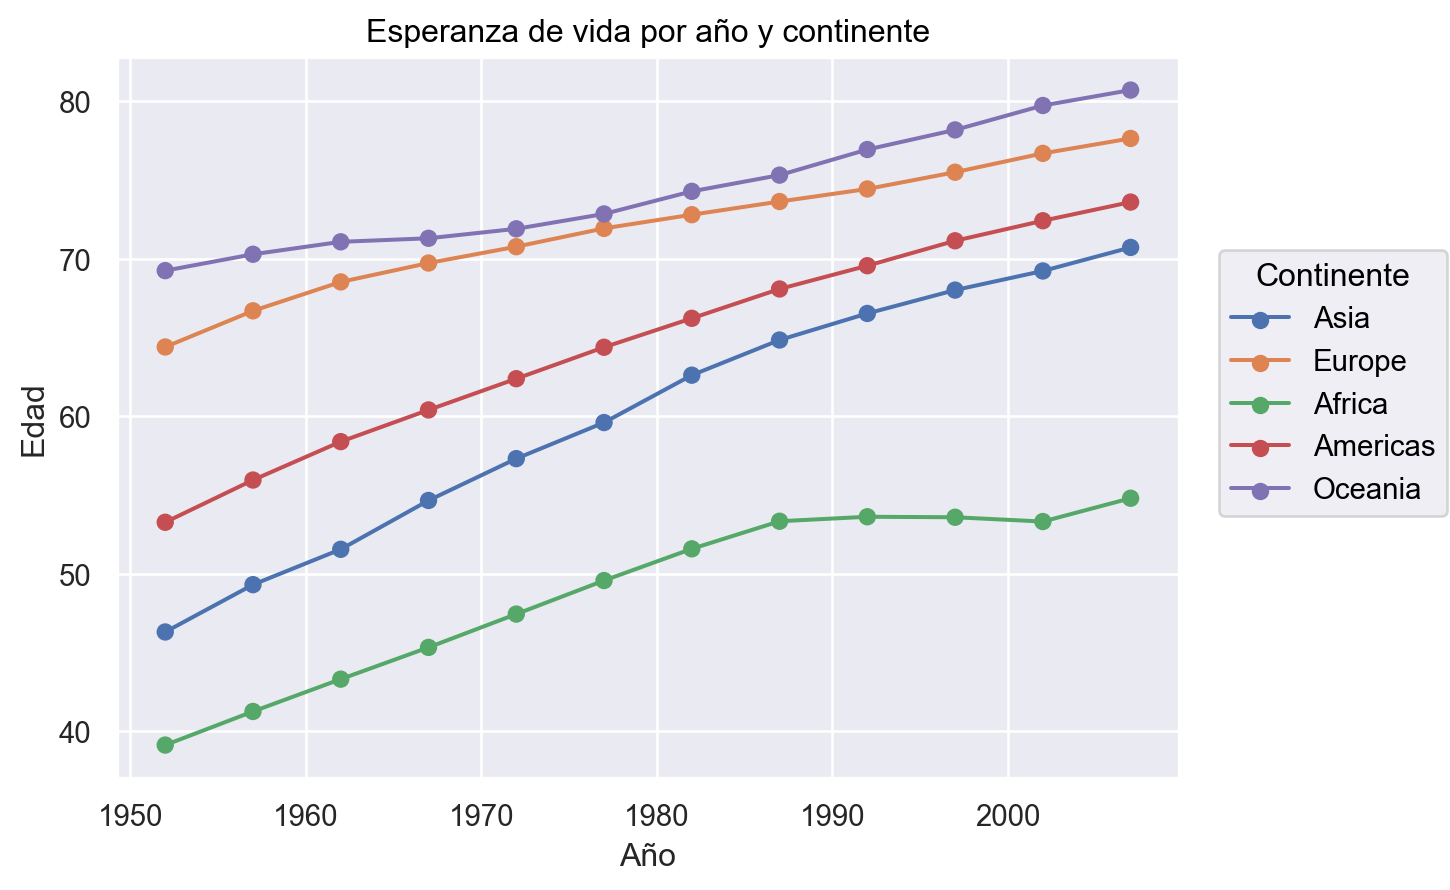

In [29]:
(
    so.Plot(gapminder, x='year', y='lifeExp',color='continent')
    .add(so.Line(),so.Agg())
    .add(so.Dot(),so.Agg())
    .label(title="Esperanza de vida por año y continente",x="Año",y="Edad",color="Continente")
)

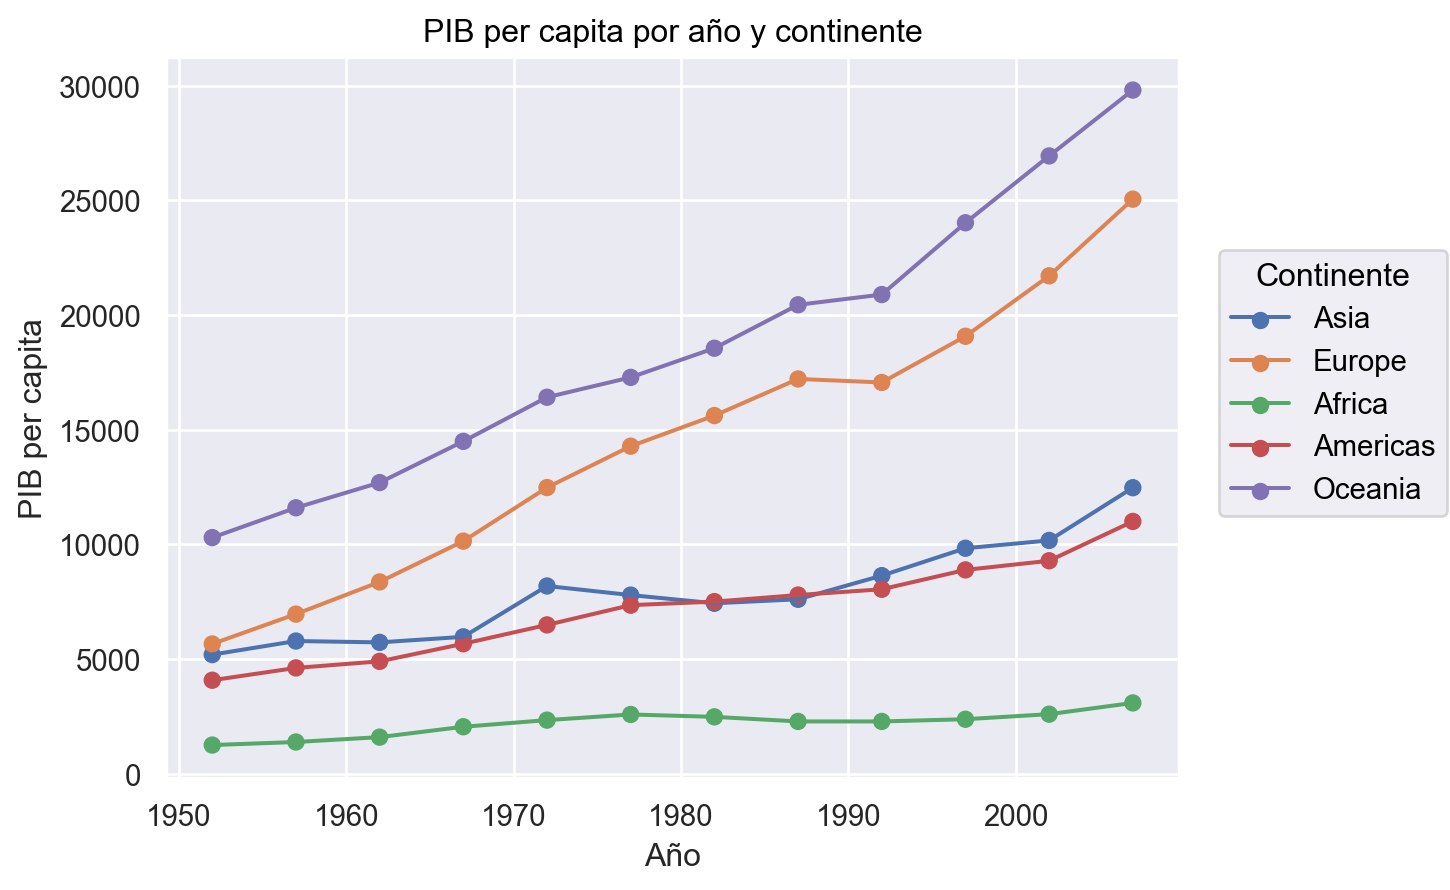

In [30]:
(
    so.Plot(gapminder, x='year', y='gdpPercap',color='continent')
    .add(so.Line(),so.Agg())
    .add(so.Dot(),so.Agg())
    .label(title="PIB per capita por año y continente",x="Año",y="PIB per capita",color="Continente")
)

### 2. Comparacion entre continentes en terminos de poblacion

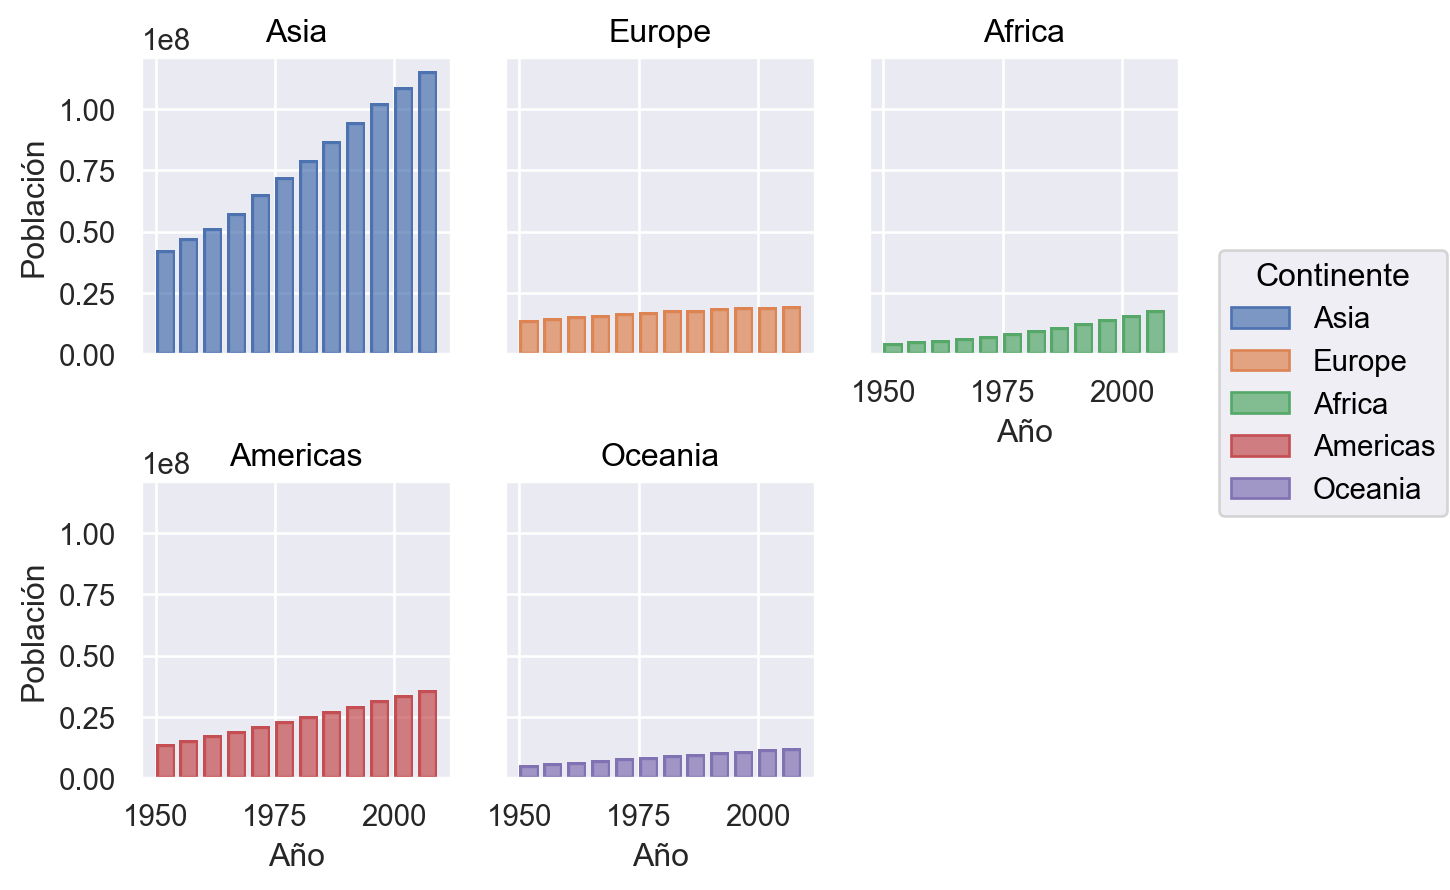

In [42]:
(
    so.Plot(gapminder, x='year', y='pop',color='continent')
    # .add(so.Line(linewidth=2),so.Agg())
    # .add(so.Dot(),so.Agg())
    .add(so.Bar(),so.Agg())
    .facet('continent',wrap=3)
    .label(x="Año",y="Población",color="Continente")
    # .label(title="Población por año y continente",x="Año",y="Población",color="Continente")
)

## 3. Ranking de paises por:
1. esperanza de vida?
2. PIB per capita

In [46]:
continentes = gapminder["continent"].unique()
for continente in continentes:
    datos = gapminder[gapminder["continent"]==continente]
    cantidad = datos["country"].nunique()
    print(f"En el continente {continente} hay {cantidad} países")
    

En el continente Asia hay 33 países
En el continente Europe hay 30 países
En el continente Africa hay 52 países
En el continente Americas hay 25 países
En el continente Oceania hay 2 países


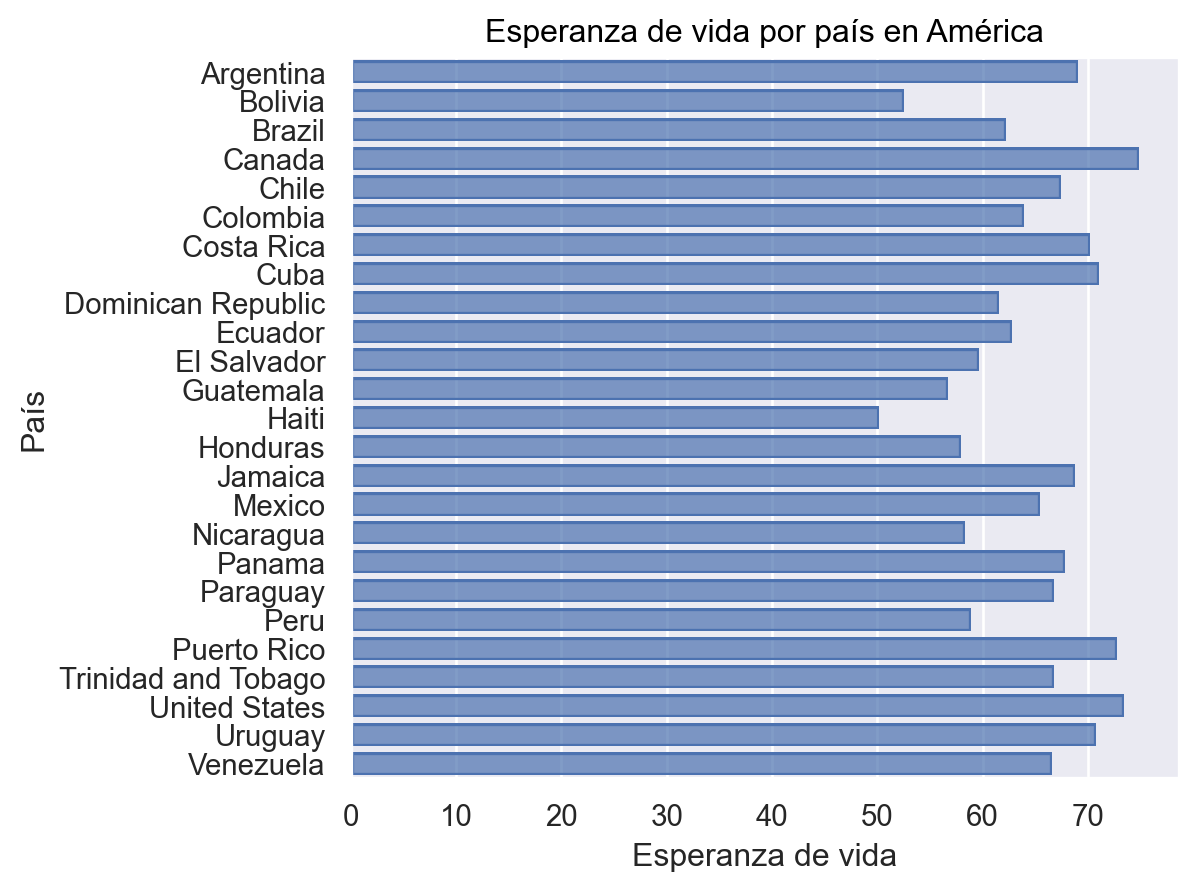

In [72]:
(
    so.Plot(gapminder[gapminder["continent"]=="Americas"], x="lifeExp", y = "country")
    .add(so.Bar(),so.Agg())
    .label(title="Esperanza de vida por país en América",x="Esperanza de vida",y="País")
)

In [ ]:
gapminder[gapminder["continent"]=="Americas"].sort_values("gdpPercap",ascending=False)

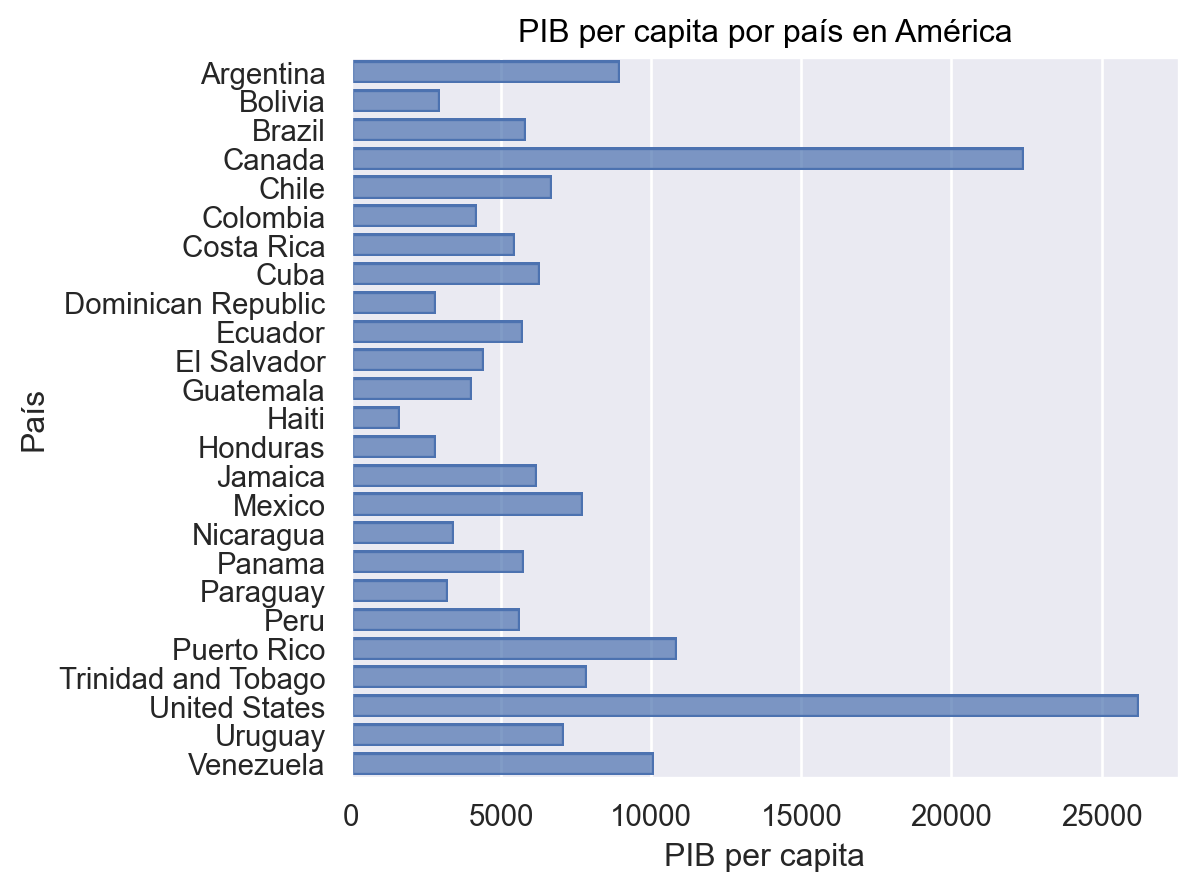

In [71]:
(
    so.Plot(gapminder[gapminder["continent"]=="Americas"], x="gdpPercap", y = "country")
    .add(so.Bar(),so.Agg())
    .label(title="PIB per capita por país en América",x="PIB per capita",y="País")
)

### 4. Algun histograma? pruebo con esperanza de vida y pib

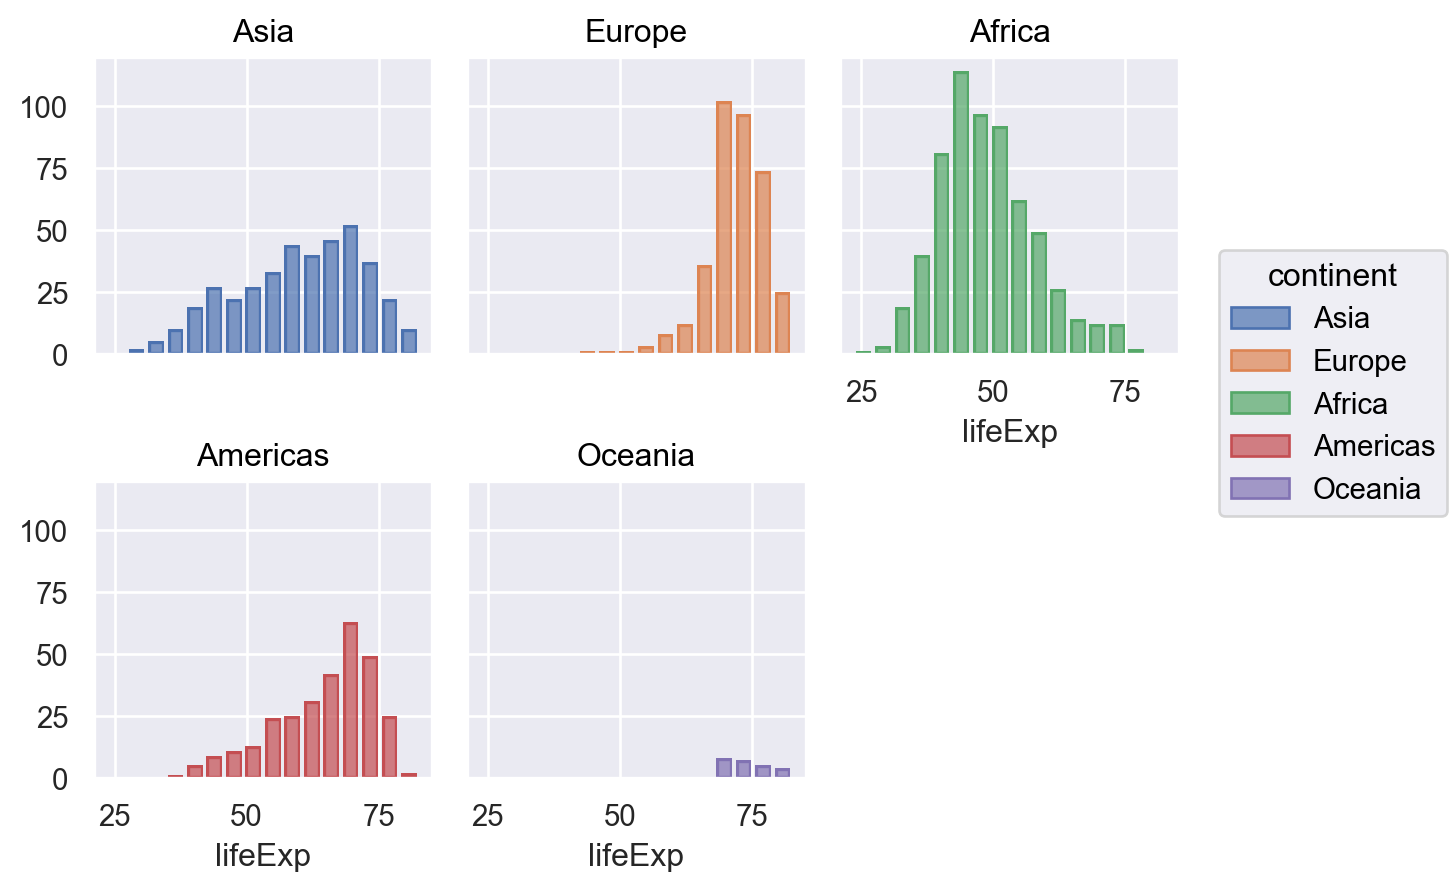

In [75]:
(
    so.Plot(gapminder, x = "lifeExp",color="continent")
    .add(so.Bar(),so.Hist())
    .facet("continent",wrap=3)
)

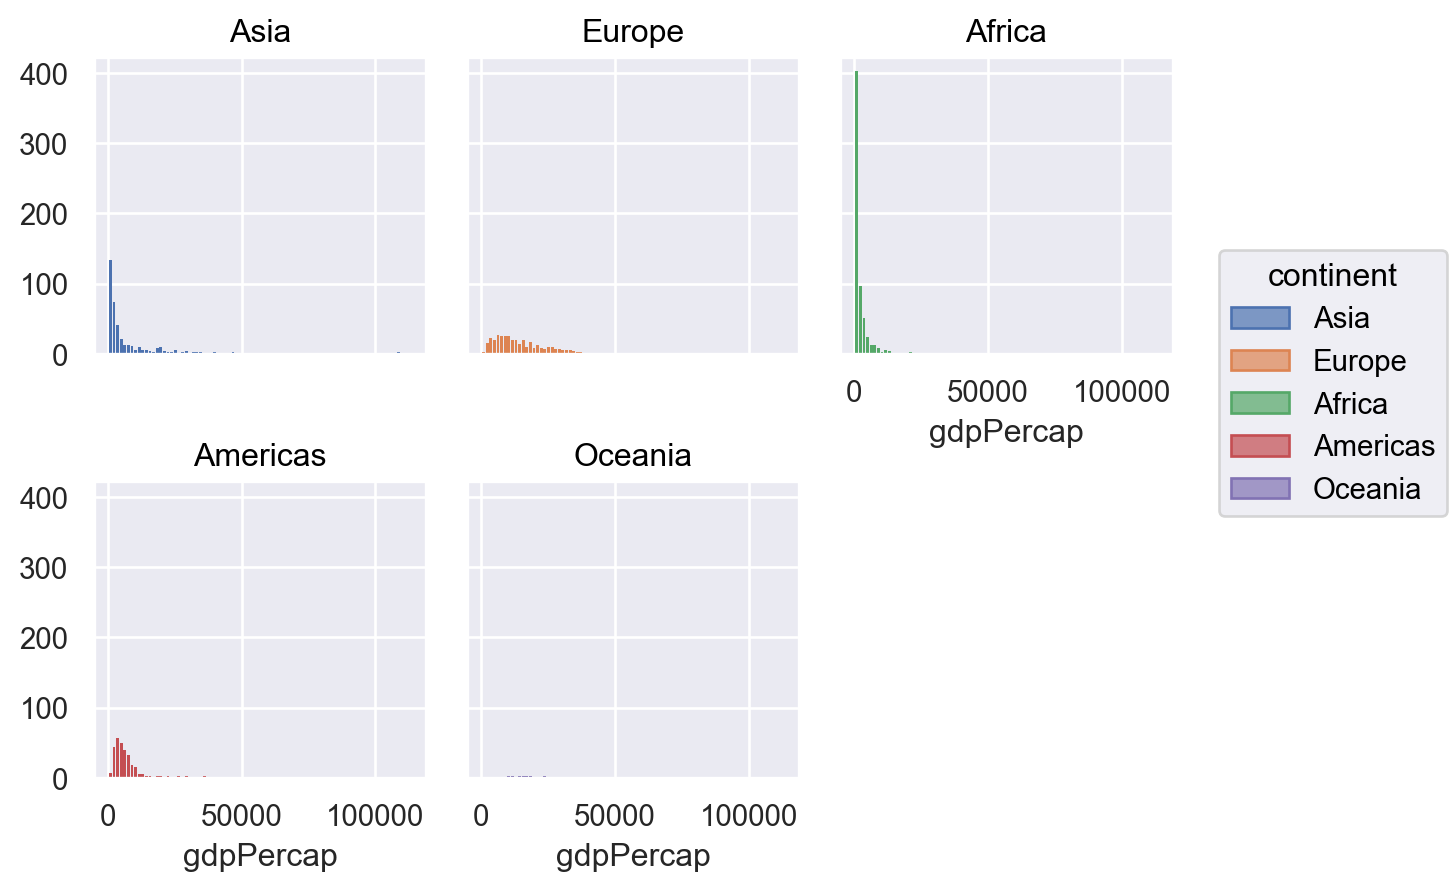

In [79]:
(
    so.Plot(gapminder, x = "gdpPercap",color="continent")
    .add(so.Bar(),so.Hist())
    .facet("continent",wrap=3)
)

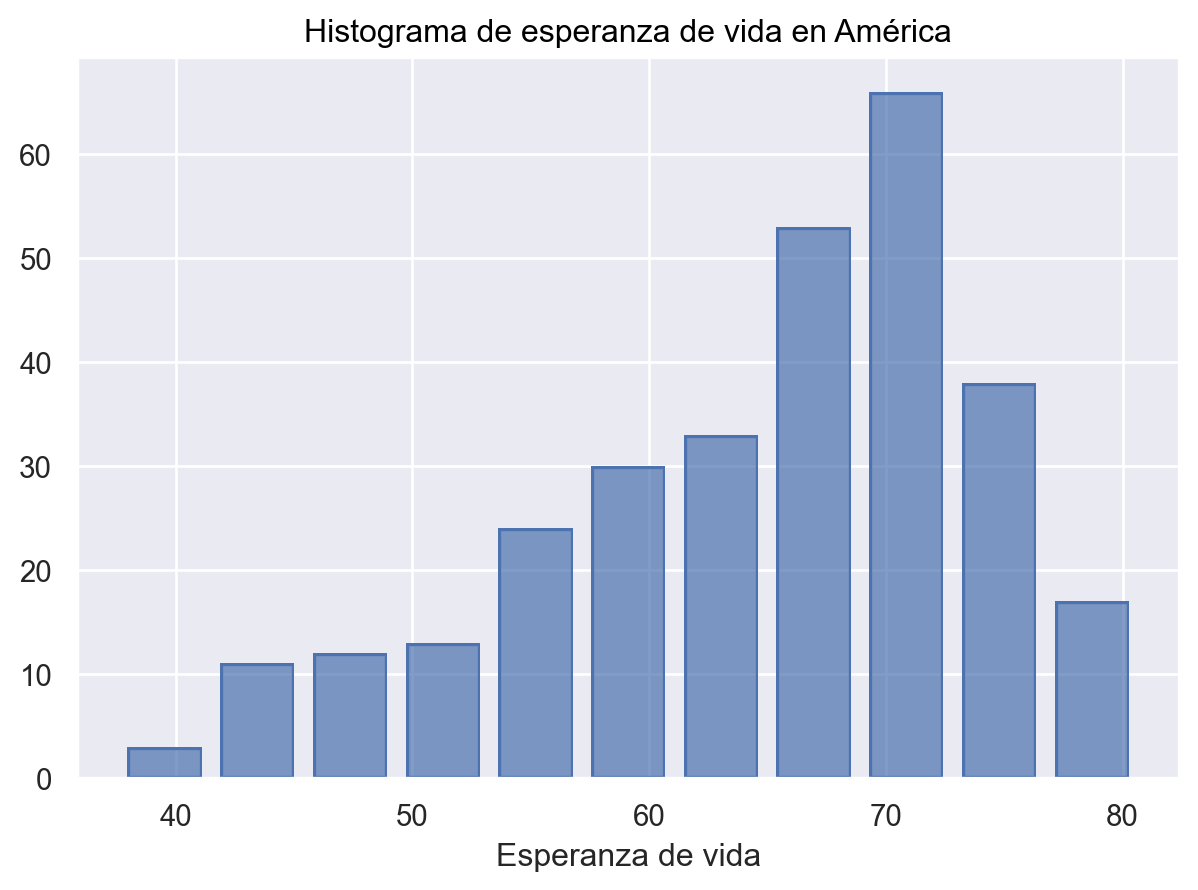

In [84]:
(
    so.Plot(gapminder[gapminder["continent"]=="Americas"], x = "lifeExp")
    .add(so.Bar(),so.Hist())
    .label(title="Histograma de esperanza de vida en América",x="Esperanza de vida")
)

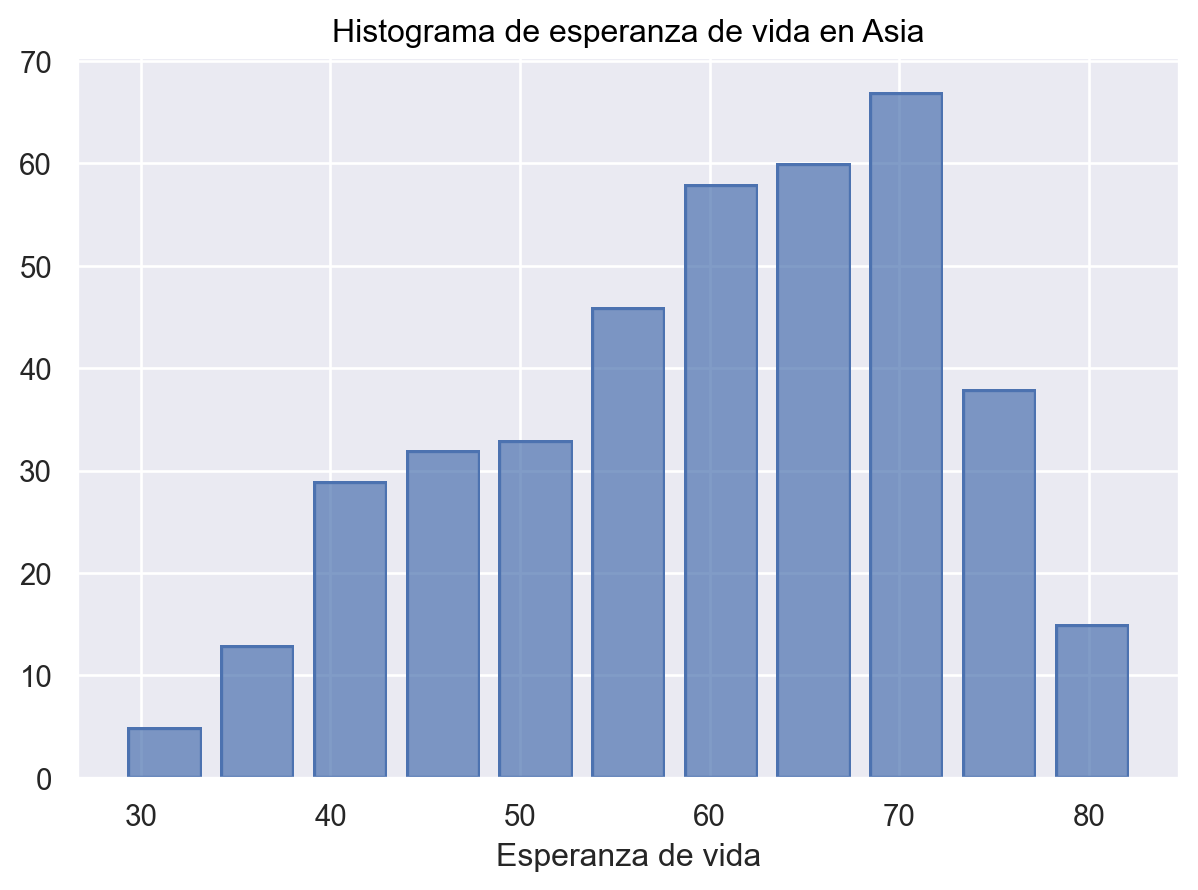

In [85]:
(
    so.Plot(gapminder[gapminder["continent"]=="Asia"], x = "lifeExp")
    .add(so.Bar(),so.Hist())
    .label(title="Histograma de esperanza de vida en Asia",x="Esperanza de vida")
)

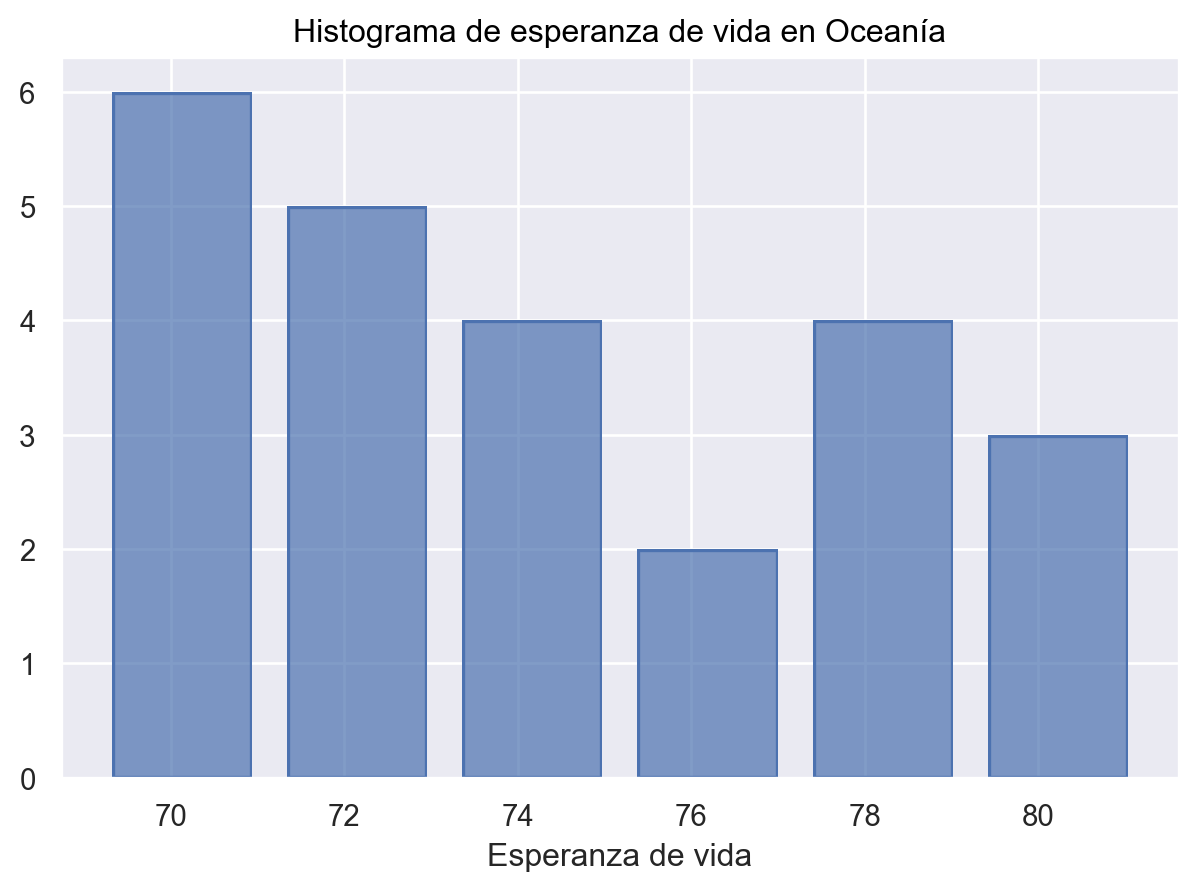

In [86]:
(
    so.Plot(gapminder[gapminder["continent"]=="Oceania"], x = "lifeExp")
    .add(so.Bar(),so.Hist())
    .label(title="Histograma de esperanza de vida en Oceanía",x="Esperanza de vida")
)

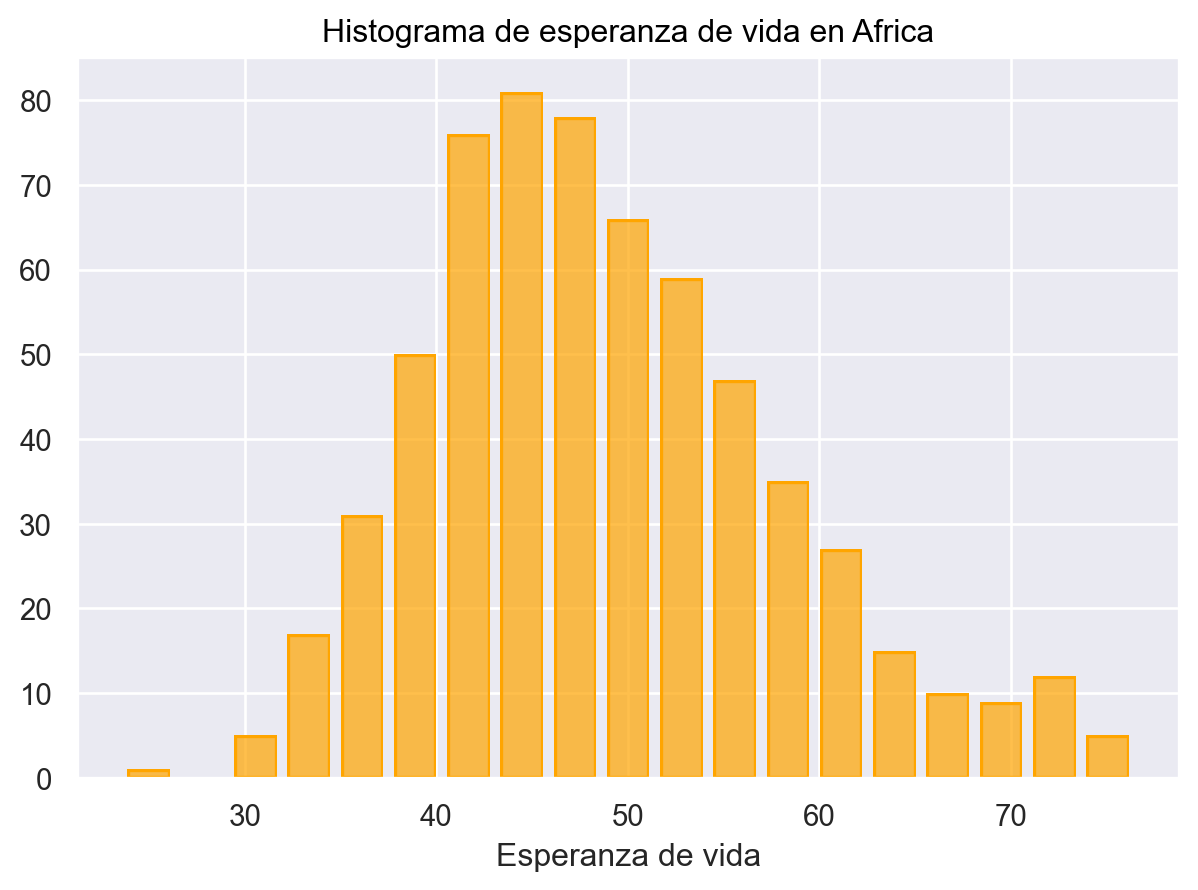

In [90]:
(
    so.Plot(gapminder[gapminder["continent"]=="Africa"], x = "lifeExp")
    .add(so.Bar(color="orange"),so.Hist())
    .label(title="Histograma de esperanza de vida en Africa",x="Esperanza de vida")
)

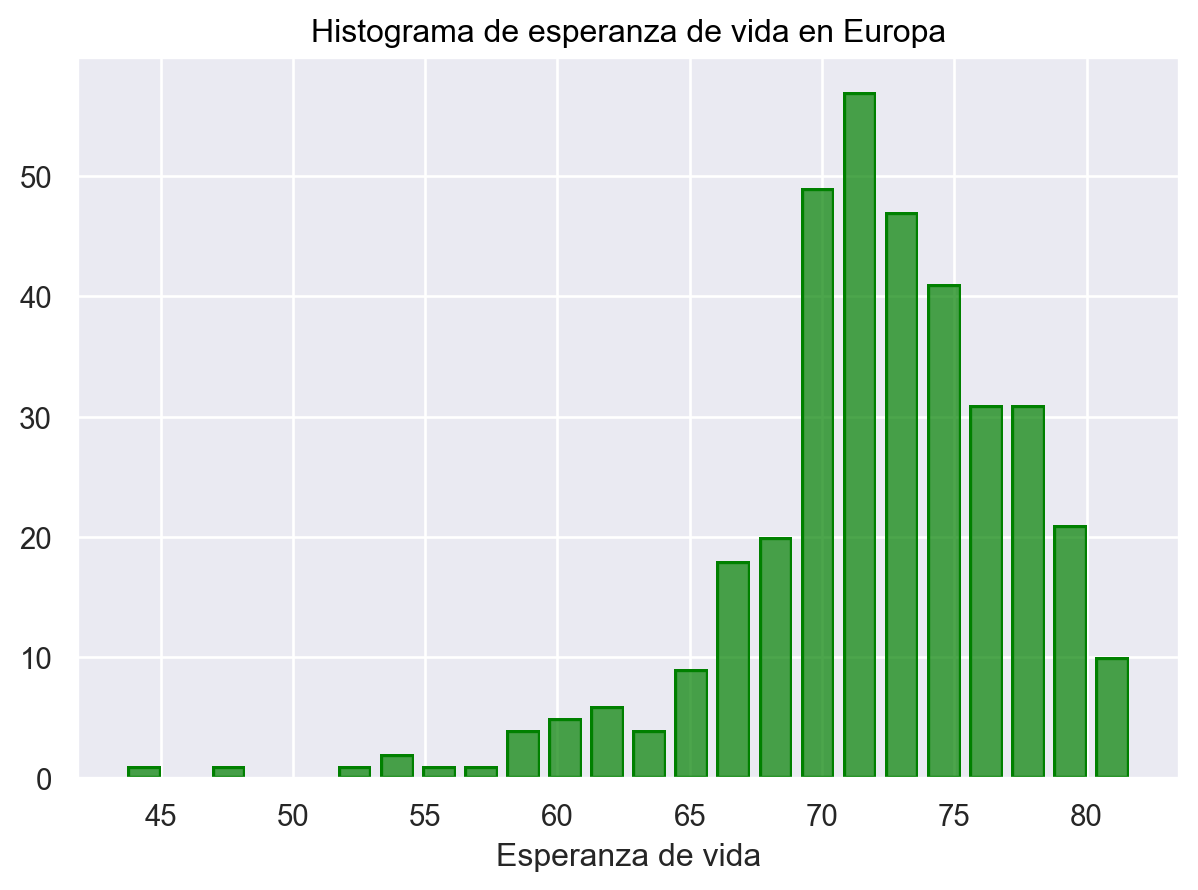

In [91]:
(
    so.Plot(gapminder[gapminder["continent"]=="Europe"], x = "lifeExp")
    .add(so.Bar(color="green"),so.Hist())
    .label(title="Histograma de esperanza de vida en Europa",x="Esperanza de vida")
)

## Es interesante contrastar el de Europa con el de africa. Como el de Europa esta mas inclinado a la derecha (mas esperanza de vida) mientras que el de Africa esta mas inclinado a la izquierda (diciendo menos esperanza de vida)

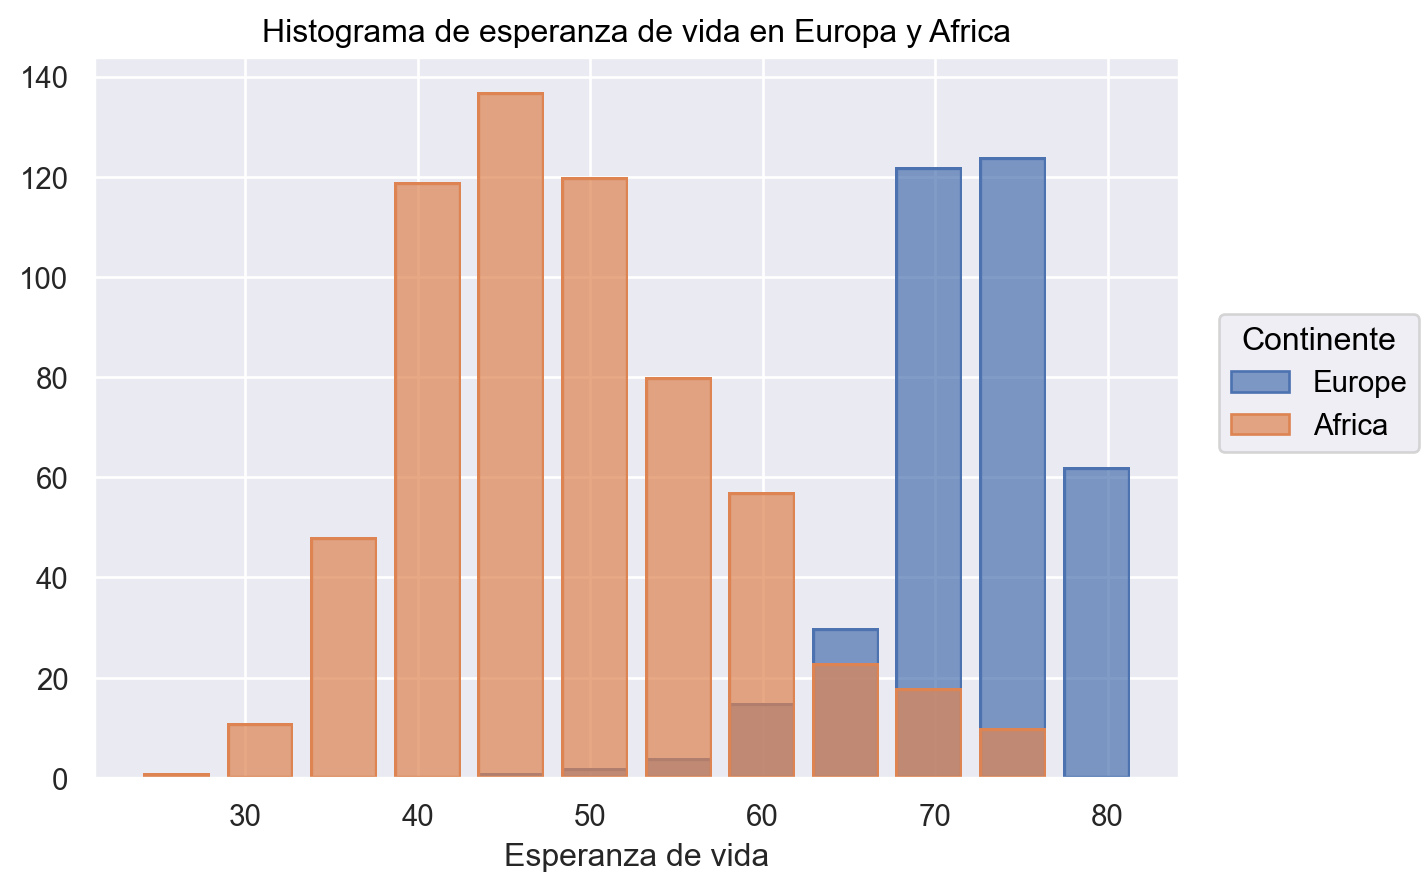

In [92]:
datos_europa_africa = gapminder[(gapminder["continent"]=="Europe") | (gapminder["continent"]=="Africa")]

(
    so.Plot(datos_europa_africa, x = "lifeExp",color="continent")
    .add(so.Bar(),so.Hist())
    .label(title="Histograma de esperanza de vida en Europa y Africa",x="Esperanza de vida",color="Continente")

)